# Tema 2 - ML aplicat

## 1. Explorarea datelor

In [3]:
%pip install numpy
%pip install matplotlib
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Citirea datelor

In [5]:
def read_csv(file_path):
    """
    Funcția citește un fișier CSV și returnează un DataFrame Pandas
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Fișierul '{file_path}' nu a fost găsit.")
    except pd.errors.EmptyDataError:
        print(f"Fișierul '{file_path}' este gol.")
    except pd.errors.ParserError:
        print(f"A existat o eroare la parsarea fișierului '{file_path}'.")
    except Exception as e:
        print(f"A apărut o eroare: {e}")

In [352]:
full_file = './tema2_SalaryPrediction/SalaryPrediction_full.csv'
train_file = './tema2_SalaryPrediction/SalaryPrediction_train.csv'
test_file = './tema2_SalaryPrediction/SalaryPrediction_test.csv'

full_file_avc = './tema2_AVC/AVC_full.csv'
train_file_avc = './tema2_AVC/AVC_train.csv'
test_file_avc = './tema2_AVC/AVC_test.csv'

### Analiza atributelor numerice

In [7]:
def generate_numerical_atributes_statistic(df):
    """
    Funcția extrage statistici pentru atributele numerice continue și generează grafice Boxplot.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    """

    # Afișează statisticile
    stats = df.describe(percentiles=[.25, .5, .75], include=[np.number])
    print("Statistici pentru atributele numerice continue:\n")
    print(stats, '\n')

    # Generează grafice Boxplot
    plt.figure(figsize=(10, 8))
    df.boxplot()
    plt.title('Boxplot pentru atributele numerice continue')
    plt.xticks(rotation=90)
    plt.show()

Statistici pentru atributele numerice continue:

       mean_blood_sugar_level  cardiovascular_issues  body_mass_indicator  \
count             5110.000000            5110.000000          4909.000000   
mean               106.147677               0.054012            28.893237   
std                 45.283560               0.226063             7.854067   
min                 55.120000               0.000000            10.300000   
25%                 77.245000               0.000000            23.500000   
50%                 91.885000               0.000000            28.100000   
75%                114.090000               0.000000            33.100000   
max                271.740000               1.000000            97.600000   

       high_blood_pressure    years_old  chaotic_sleep  analysis_results  \
count          5110.000000  5110.000000    5110.000000       4599.000000   
mean              0.097456    46.568665       0.054012        323.523446   
std               0.296607   

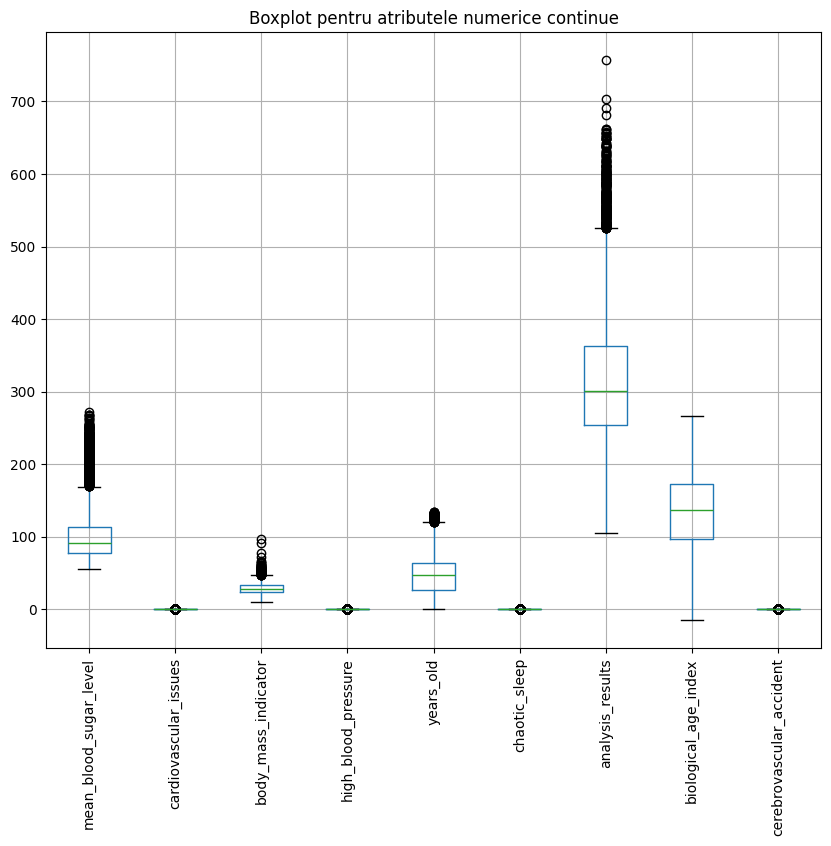

In [355]:
# Extrage statistici și generează grafice Boxplot
X = read_csv(full_file_avc)
generate_numerical_atributes_statistic(X)

### Analiza atributelor categorice sau ordinale

In [9]:
def generate_discrete_atributes_statistics(df):
    """
    Funcția extrage statistici pentru atributele discrete sau ordinale.

    :param df: DataFrame Pandas cu datele din fișierul CSV
    """

    # Afișează statisticile
    print("Statistici pentru atributele discrete sau ordinale:\n")

    # Selectează coloanele discrete sau ordinale
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    stats_df = pd.DataFrame(columns=[
        'Atribut', 'Număr de exemple (fără valori lipsă)', 'Număr de valori unice'
    ])

    # Calculează statisticile pentru fiecare coloană discretă sau ordinală
    stats_list = []
    for col in categorical_columns:
        col_data = df[col]
        stats_list.append({
            'Atribut': col,
            'Număr de exemple (fără valori lipsă)': col_data.count(),
            'Număr de valori unice': col_data.nunique()
        })

    # Convertește lista de statistici într-un DataFrame
    stats_df = pd.DataFrame(stats_list)
    
    print(stats_df, "\n")


    #################### Varianta 2 ######################
    stats = df.describe(include=['O', 'category'])
    stats = stats.loc[['count', 'unique']]
    # print(stats, '\n')

    # Afișează histogramă
    for col in categorical_columns:
        # Obține seria de frecvență a valorilor unice
        col_value_counts = df[col].value_counts()
        # Crează o histogrmă cu frecvențele valorilor unice
        col_value_counts.hist()
    

Statistici pentru atributele discrete sau ordinale:

         Atribut  Număr de exemple (fără valori lipsă)  Număr de valori unice
0   job_category                                  5110                      5
1            sex                                  5110                      2
2  tobacco_usage                                  5110                      4
3        married                                  4599                      2
4    living_area                                  5110                      2 



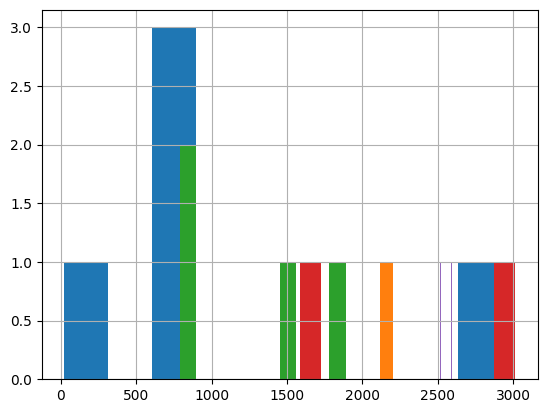

In [367]:
# Testează funcția de generare de statistici
X = read_csv(full_file_avc)
generate_discrete_atributes_statistics(X)

### Analiza corelației între atribute

In [358]:
def numerical_atributes_corelation_analysis(X, display: bool = False):
    """
    Funcția analizează corelația între atributele numerice utilizând criteriul Pearson și
    afișează matricea de corelație utilizând matshow.

    :param X: DataFrame Pandas cu datele din fișierul CSV
    """
    # Selectează doar atributele numerice
    numerical_columns = X.select_dtypes(include=[np.number]).columns
    X = X[numerical_columns]

    # Calculează matricea de corelație
    corr_matrix = X.corr()

    if display == True:
        print("Matricea de corelație pentru atributele numerice:")
        print(corr_matrix, "\n")
        
        # Vizualizează matricea de corelație
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
        fig.colorbar(cax)
        ticks = np.arange(0, len(X.columns), 1)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.set_xticklabels(X.columns)
        ax.set_yticklabels(X.columns)
        plt.show()

    return corr_matrix

# Printează matricea de corelație pentru atributele numerice
def print_corr_matrix(corr_matrix):
    """
    Funcția afișează matricea de corelație utilizând matshow.

    :param corr_matrix: Matricea de corelație
    """
    print("Matricea de corelație pentru atributele numerice:")
    print(corr_matrix, "\n")
    
    # Vizualizează matricea de corelație
    fig = plt.figure(figsize=(120, 10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(X.columns), 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(X.columns)
    ax.set_yticklabels(X.columns)
    plt.show()

Matricea de corelație pentru atributele numerice:
                          mean_blood_sugar_level  cardiovascular_issues  \
mean_blood_sugar_level                  1.000000               0.161857   
cardiovascular_issues                   0.161857               1.000000   
body_mass_indicator                     0.175502               0.041357   
high_blood_pressure                     0.174474               0.108306   
years_old                               0.193335               0.205277   
chaotic_sleep                           0.161857               1.000000   
analysis_results                        0.894289               0.155915   
biological_age_index                    0.213950               0.231282   
cerebrovascular_accident                0.131945               0.134914   

                          body_mass_indicator  high_blood_pressure  years_old  \
mean_blood_sugar_level               0.175502             0.174474   0.193335   
cardiovascular_issues                

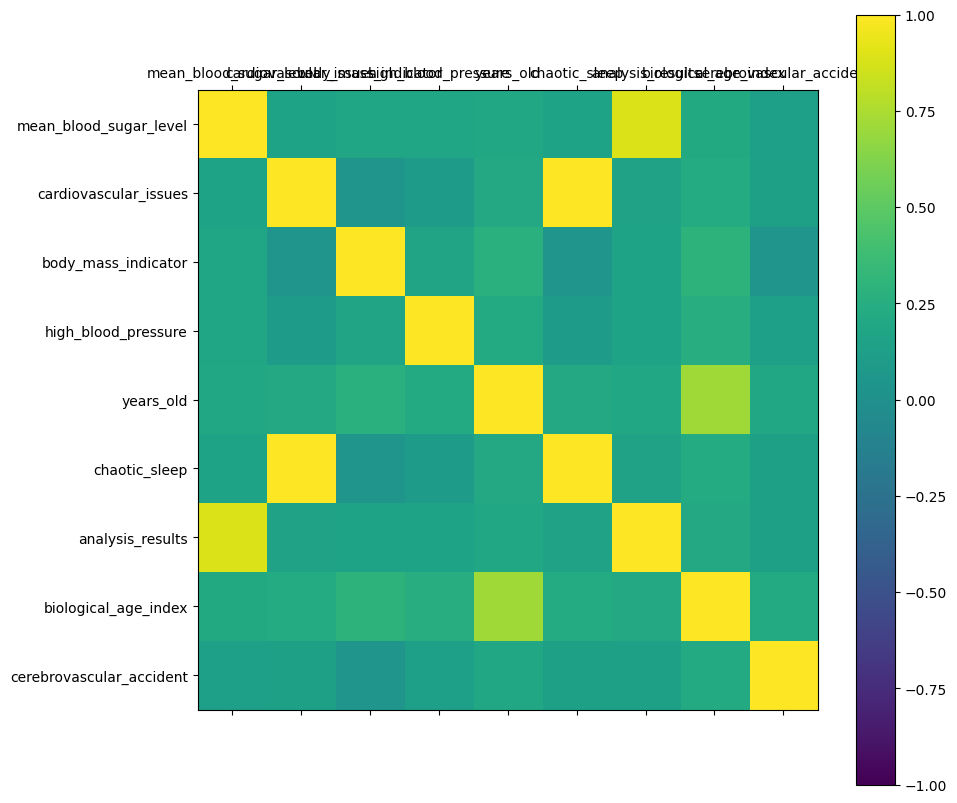

In [360]:
# Analizează corelația între atributele numerice
X = read_csv(full_file_avc)
corr_matrix = numerical_atributes_corelation_analysis(X, display=True)

In [368]:
from scipy.stats import chi2_contingency

def category_atributes_corelation_analysis(X, display: bool = False):
    """
    Funcția analizează corelația între atributele categorice utilizând testul Chi-Pătrat.

    :param X: DataFrame Pandas cu datele din fișierul CSV
    """
    # Selectează coloanele categorice
    categorical_columns = X.select_dtypes(include=['object', 'category']).columns

    # Setează nivelul de semnificație
    alpha = 0.05

    # Generează testele Chi-Pătrat pentru fiecare pereche de coloane categorice
    chi2_results = []
    to_drop = set()
    for i, col1 in enumerate(categorical_columns):
        for col2 in categorical_columns[i + 1:]:
            CrosstabResult = pd.crosstab(X[col1], X[col2])
            ChiSqResult = chi2_contingency(CrosstabResult)
            chi2_results.append({
                'Atribute': f"{col1} vs {col2}",
                'p-value': ChiSqResult[1]
            })
            if ChiSqResult[1] < alpha:
                to_drop.add(col2)

    # Convertește rezultatele într-un DataFrame
    chi2_X = pd.DataFrame(chi2_results)
    
    if display == True:
        # Afișează rezultatele testului Chi-Pătrat
        print("Rezultatele testului Chi-Pătrat pentru atributele categorice:\n")
        print(chi2_X, "\n")

        print("Categoriile de eliminat sunt:\n")
        print(to_drop, "\n")

    return chi2_X, to_drop

In [369]:
# Testează funcția de analiza a corelației atributelor
X = read_csv(full_file_avc)
chi2_x, to_drop = category_atributes_corelation_analysis(X, display=True)

Rezultatele testului Chi-Pătrat pentru atributele categorice:

                        Atribute        p-value
0            job_category vs sex   1.480860e-08
1  job_category vs tobacco_usage  3.103282e-290
2        job_category vs married   0.000000e+00
3    job_category vs living_area   3.247540e-01
4           sex vs tobacco_usage   2.048248e-11
5                 sex vs married   8.946837e-02
6             sex vs living_area   6.709856e-01
7       tobacco_usage vs married  9.372829e-116
8   tobacco_usage vs living_area   1.446816e-01
9         married vs living_area   9.875681e-01 

Categoriile de eliminat sunt:

{'sex', 'married', 'tobacco_usage'} 



## 2.  Preprocesarea datelor

### Date lipsă pentru un atribut într-un eșantion

In [370]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

def impute_missing_values(X, method: str):
    """
    Funcția completează valorile lipsă din DataFrame-ul dat.

    :param X: DataFrame Pandas cu datele din fișierul CSV
    :param method: Metoda de completare a valorilor lipsă (SimpleImputer, IterativeImputer)
    """
    
    # Verifică dacă metoda este validă
    if method not in ['SimpleImputer', 'IterativeImputer']:
        print(f"Metoda '{method}' nu este validă.")
        return

    # Copiază DataFrame-ul pentru a nu modifica originalul
    filled_X = X.copy(deep=True)
    numeric_columns = X.select_dtypes(include=[np.number]).columns
    category_columns = X.select_dtypes(include=['object', 'category']).columns

    # Completează valorile lipsă
    if method == 'SimpleImputer':
        # Selectează doar coloanele numerice

        # Completează valorile lipsă cu media
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        filled_X[numeric_columns] = imp.fit_transform(filled_X[numeric_columns])

        # Completează valorile lipsă categorice cu valoarea cea mai frecventă
        imp = SimpleImputer(strategy="most_frequent")
        filled_X[category_columns] = imp.fit_transform(filled_X[category_columns])

        return filled_X
    else:
        # Completează valorile lipsă numerice folosind metoda IterativeImputer
        imp = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)
        imp.fit(filled_X[numeric_columns])
        filled_X[numeric_columns] = imp.transform(filled_X[numeric_columns])

        # Completează valorile lipsă categorice cu valoarea cea mai frecventă
        # imp = IterativeImputer(max_iter=10, random_state=0, initial_strategy="most_frequent")
        # imp.fit(filled_X[category_columns])
        # filled_X[category_columns] = imp.transform(filled_X[category_columns])

        return filled_X

In [371]:
# Completează valorile lipsă folosind SimpleImputer
X = read_csv(full_file_avc)
X_simple_filled = impute_missing_values(X, 'SimpleImputer')
# print(filled_df)
X_simple_filled.describe().loc['count']

mean_blood_sugar_level      5110.0
cardiovascular_issues       5110.0
body_mass_indicator         5110.0
high_blood_pressure         5110.0
years_old                   5110.0
chaotic_sleep               5110.0
analysis_results            5110.0
biological_age_index        5110.0
cerebrovascular_accident    5110.0
Name: count, dtype: float64

In [372]:
# Completează valorile lipsă folosind IterativeImputer
X = read_csv(full_file_avc)
X_iterative_filled = impute_missing_values(X, 'IterativeImputer')
# print(filled_X)
X_iterative_filled.describe().loc['count']

mean_blood_sugar_level      5110.0
cardiovascular_issues       5110.0
body_mass_indicator         5110.0
high_blood_pressure         5110.0
years_old                   5110.0
chaotic_sleep               5110.0
analysis_results            5110.0
biological_age_index        5110.0
cerebrovascular_accident    5110.0
Name: count, dtype: float64

### Valori extreme pentru un atribut într-un eșantion

In [373]:
def detect_and_exclude_outliers(X):
    """
    Funcția detectează și elimină outlierii din DataFrame-ul dat.
    """
    # Selectează doar atributele numerice
    numerical_columns = X.select_dtypes(include=[np.number]).columns
    threshold = 1.5

    # Elimină outlierii
    for col in numerical_columns:
        Q1 = X[col].quantile(0.1)
        Q3 = X[col].quantile(0.9)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Setați valorile care sunt în afara intervalului ca NaN
        X[col] = X[col].mask((X[col] < lower_bound) | (X[col] > upper_bound))

In [374]:
# Elimină outlierii
X = read_csv(full_file_avc)
detect_and_exclude_outliers(X)
X.describe().loc['count']

mean_blood_sugar_level      5110.0
cardiovascular_issues       4834.0
body_mass_indicator         4905.0
high_blood_pressure         4612.0
years_old                   5110.0
chaotic_sleep               4834.0
analysis_results            4599.0
biological_age_index        5110.0
cerebrovascular_accident    4861.0
Name: count, dtype: float64

In [375]:
# Imputare valori lipsă
X = read_csv(full_file_avc)
X = impute_missing_values(X, 'IterativeImputer')
X.describe().loc['count']

mean_blood_sugar_level      5110.0
cardiovascular_issues       5110.0
body_mass_indicator         5110.0
high_blood_pressure         5110.0
years_old                   5110.0
chaotic_sleep               5110.0
analysis_results            5110.0
biological_age_index        5110.0
cerebrovascular_accident    5110.0
Name: count, dtype: float64

### Atribute redundante (puternic corelate)

In [378]:
def eliminate_redundant_atributes(X, display: bool = False):
    """
    Funcția elimină atributele redundante din DataFrame-ul dat.
    """
    # Obține matricea de corelație
    corr_matrix = numerical_atributes_corelation_analysis(X).abs()

    if display == True:
        print(corr_matrix)

    # Pragul pentru a considera corelația puternică
    threshold = 0.8

    # Identifică coloanele care sunt puternic corelate
    # Selectează triunghiul superior al matricei de corelație
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Găsește coloanele care au corelații puternice
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Elimină coloanele care sunt puternic corelate
    X_reduced = X.drop(columns=to_drop)

    if display == True:
        print("\nColoanele eliminate: ", to_drop)

    # afisare coloane numerice
    numerical_columns = X_reduced.select_dtypes(include=[np.number]).columns
    if display == True:
        print("\nDataFrame-ul după eliminarea coloanelor puternic corelate:\n", X_reduced[numerical_columns].head())

    # Elimină coloanele categorice puternic corelate
    chi2_X, to_drop = category_atributes_corelation_analysis(X_reduced)

    # Dacă majoritatea sunt corelate, nu eliminăm nicio coloană
    if len(to_drop) < len(X_reduced.columns) / 3:
        X_reduced = X.drop(columns=to_drop)

    if display == True:
        print("\nDataFrame-ul după eliminarea coloanelor puternic corelate:\n", X_reduced)

    X = X_reduced


In [379]:
# Testare eliminare atribute redundante
X = read_csv(full_file_avc)
X = eliminate_redundant_atributes(X, display=True)

                          mean_blood_sugar_level  cardiovascular_issues  \
mean_blood_sugar_level                  1.000000               0.161857   
cardiovascular_issues                   0.161857               1.000000   
body_mass_indicator                     0.175502               0.041357   
high_blood_pressure                     0.174474               0.108306   
years_old                               0.193335               0.205277   
chaotic_sleep                           0.161857               1.000000   
analysis_results                        0.894289               0.155915   
biological_age_index                    0.213950               0.231282   
cerebrovascular_accident                0.131945               0.134914   

                          body_mass_indicator  high_blood_pressure  years_old  \
mean_blood_sugar_level               0.175502             0.174474   0.193335   
cardiovascular_issues                0.041357             0.108306   0.205277   
body_m

### Standardizarea datelor

In [388]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

def normalize_data(X, method: str):
    """
    Funcția normalizează datele din DataFrame-ul dat.

    :param X: DataFrame Pandas cu datele din fișierul CSV
    :param method: Metoda de normalizare a datelor (StandardScaler, MinMaxScaler, RobustScaler)   
    """
    # Selectează doar atributele numerice
    numerical_columns = X.select_dtypes(include=[np.number]).columns

    # Normalizează datele
    if method == 'StandardScaler':
        scaler = preprocessing.StandardScaler().fit(X[numerical_columns])
        scaler.mean_
        scaler.scale_

        X_minmax = X
        X_minmax[numerical_columns] = scaler.transform(X[numerical_columns])

        return X_minmax

    elif method == 'MinMaxScaler':
        max_abs_scaler = preprocessing.MaxAbsScaler()
        X_maxabs = X
        X_maxabs[numerical_columns] = max_abs_scaler.fit_transform(X[numerical_columns])

        return X_maxabs

    elif method == 'RobustScaler':
        robust_scaler = preprocessing.RobustScaler()
        X_robust = X
        X_robust[numerical_columns] = robust_scaler.fit_transform(X[numerical_columns])

        return X_robust
        

In [383]:
# Testare normalizare Standard
X = read_csv(full_file_avc)
X = normalize_data(X, method='StandardScaler')
print(X.head())

   mean_blood_sugar_level  cardiovascular_issues     job_category  \
0                2.706375               4.185032   private_sector   
1                2.121559              -0.238947  entrepreneurial   
2               -0.005028               4.185032   private_sector   
3                1.437358              -0.238947   private_sector   
4                1.501184              -0.238947  entrepreneurial   

   body_mass_indicator sex tobacco_usage  high_blood_pressure married  \
0             0.981345   M     ex-smoker            -0.328602       Y   
1                  NaN   F    non-smoker            -0.328602       Y   
2             0.459269   M    non-smoker            -0.328602       Y   
3             0.701207   F        smoker            -0.328602       Y   
4            -0.623083   F    non-smoker             3.043196       Y   

   living_area  years_old  chaotic_sleep  analysis_results  \
0         City   0.768346       4.185032          1.773607   
1  Countryside   0.542

In [389]:
# Testare normalizare MinMaxScaler
X = read_csv(full_file_avc)
X = normalize_data(X, method='MinMaxScaler')
print(X.head())

   mean_blood_sugar_level  cardiovascular_issues     job_category  \
0                0.841577                    1.0   private_sector   
1                0.744130                    0.0  entrepreneurial   
2                0.389784                    1.0   private_sector   
3                0.630124                    0.0   private_sector   
4                0.640760                    0.0  entrepreneurial   

   body_mass_indicator sex tobacco_usage  high_blood_pressure married  \
0             0.375000   M     ex-smoker                  0.0       Y   
1                  NaN   F    non-smoker                  0.0       Y   
2             0.332992   M    non-smoker                  0.0       Y   
3             0.352459   F        smoker                  0.0       Y   
4             0.245902   F    non-smoker                  1.0       Y   

   living_area  years_old  chaotic_sleep  analysis_results  \
0         City   0.500000            1.0          0.665509   
1  Countryside   0.455

In [390]:
# Testare normalizare RobustScaler
X = read_csv(full_file_avc)
X = normalize_data(X, method='RobustScaler')
print(X.head())

   mean_blood_sugar_level  cardiovascular_issues     job_category  \
0                3.712987                    1.0   private_sector   
1                2.994300                    0.0  entrepreneurial   
2                0.380920                    1.0   private_sector   
3                2.153481                    0.0   private_sector   
4                2.231917                    0.0  entrepreneurial   

   body_mass_indicator sex tobacco_usage  high_blood_pressure married  \
0             0.885417   M     ex-smoker                  0.0       Y   
1                  NaN   F    non-smoker                  0.0       Y   
2             0.458333   M    non-smoker                  0.0       Y   
3             0.656250   F        smoker                  0.0       Y   
4            -0.427083   F    non-smoker                  1.0       Y   

   living_area  years_old  chaotic_sleep  analysis_results  \
0         City   0.529801            1.0          1.873147   
1  Countryside   0.370

## 3. Utilizarea algoritmilor de Învățare Automată

### Regresie Logistică

#### Implementare manuală

In [400]:
from numpy import log
from numpy import round

def split_dataset(X, T, train=.8):
    N = X.shape[0]
    N_train = int(round(N * train))
    N_test = N - N_train

    X_train, X_test = X[:N_train,:], X[N_train:,:]
    T_train, T_test = T[:N_train], T[N_train:]
    return X_train, T_train, X_test, T_test


# Functia de sigmoida logistica
def logistic(x):
    return 1 / (1 + np.exp(-x))

def nll(Y, T):
    # Expresia functiei de Negative Log Likelihood
    return -np.transpose(T) @ log(Y) - (1 - np.transpose(T)) @ log(1 - Y)

# Expresia care intoarce acuratetea clasificarii
def accuracy(Y, T):
    return sum(round(Y) == T) / len(Y)

def predict_logistic(X, w):
    # Predictia Y a modelului logistic antrenat (ponderile w invatate)
    return logistic(X @ w)

def train_and_eval_logistic(X_train, T_train, X_test, T_test, lr=.01, epochs_no=100):
    # Antrenăm modelul
    (N, D) = X_train.shape
    
    # Initializare ponderi
    w = np.random.randn(D)
    
    train_acc, test_acc = [], []
    train_nll, test_nll = [], []

    for epoch in range(epochs_no):
        # 1. Obtinem Y_train si Y_test folosind functia predict_logistic
        Y_train = predict_logistic(X_train, w)
        Y_test = predict_logistic(X_test, w)
        # 2. Adaugăm acuratetea si negative log likelihood-ul pentru setul de antrenare si de testare 
        #    la fiecare pas
        train_acc.append(accuracy(Y_train, T_train))
        train_nll.append(nll(Y_train, T_train))
        test_acc.append(accuracy(Y_test, T_test))
        test_nll.append(nll(Y_test, T_test))
        # 3. Actualizăm ponderile w folosind regula de actualizare a gradientului
        w = w - lr * 1 / N * np.transpose(X_train) @ (Y_train - T_train)        

    return w, train_nll, test_nll, train_acc, test_acc

In [117]:
def plot_evolution(train_acc, test_acc, train_nll, test_nll):
    epochs_no = len(train_acc)
    fig, (ax1, ax2) = plt.subplots(2,1)

    # Afisam cu verde acuratetea pe setul de antrenare si cu rosu acuratetea pe setul de testare
    ax1.plot(range(epochs_no), train_acc, label="Train Accuracy", color="green")
    ax1.plot(range(epochs_no), test_acc, label="Test Accuracy", color="red")
    ax1.set_ylabel("Accuracy")
    ax1.legend(loc='lower right', ncol=1)

    # Afisam cu verde NLL pe setul de antrenare si cu rosu NLL pe setul de testare
    ax2.plot(range(epochs_no), train_nll, label="Train NLL", color="green")
    ax2.plot(range(epochs_no), test_nll, label="Test NLL", color="red")
    ax2.set_xlabel("iteration")
    ax2.set_ylabel("NLL")
    ax2.legend(loc='upper right', ncol=1)
    
    plt.show()

In [408]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

def categorical_to_numeric(X, target_column):
    """
    Funcția transformă atributele categorice în atribute numerice.

    :param X: DataFrame Pandas cu datele din fișierul CSV
    """
    # Selectează coloanele categorice
    categorical_columns = X.select_dtypes(include=['object', 'category']).columns
    # target_column = 'money'

    # 3. Aplică LabelEncoder pe variabila țintă
    label_encoder = LabelEncoder()
    X[target_column] = label_encoder.fit_transform(X[target_column])

    # 4. Aplică OneHotEncoder pe variabilele categorice
    X_encoded = pd.get_dummies(X, dtype=float)

    return X_encoded

Antrenarea și utilizarea modelului

In [409]:
def get_data(full_file, train_file, test_file):
    target_column = 'money'
    if 'AVC' in full_file:
        target_column = 'cerebrovascular_accident'

    # 0. Citire date din fisier
    X_test = read_csv(test_file)
    X_train = read_csv(train_file)
    X = read_csv(full_file)

    # 1. Imputăm valorile lipsă
    X_test = impute_missing_values(X_test, method='SimpleImputer')
    X_train = impute_missing_values(X_train, method='SimpleImputer')
    X = impute_missing_values(X, method='SimpleImputer')

    # 2. Eliminăm coloanele extreme
    detect_and_exclude_outliers(X_test)
    detect_and_exclude_outliers(X_train)
    detect_and_exclude_outliers(X)
    
    X_test = impute_missing_values(X_test, method='SimpleImputer')
    X_train = impute_missing_values(X_train, method='SimpleImputer')
    X = impute_missing_values(X, method='SimpleImputer')

    # 3. Eliminăm coloanele redundante
    eliminate_redundant_atributes(X_test)
    eliminate_redundant_atributes(X_train)
    eliminate_redundant_atributes(X)

    # 4. Normalizăm datele
    X_test = normalize_data(X_test, 'StandardScaler')
    X_train = normalize_data(X_train, 'StandardScaler')
    X = normalize_data(X, 'StandardScaler')

    # 5. Change categorical values to numerical
    X_test = categorical_to_numeric(X_test, target_column)
    X_train = categorical_to_numeric(X_train, target_column)
    X = categorical_to_numeric(X, target_column)

    X_train = X_train.reindex(columns=X_test.columns, fill_value=0)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    X = X.reindex(columns=X_train.columns, fill_value=0)

    # Scoatem T-ul
    T_test = X_test[target_column]
    T_train = X_train[target_column]
    T = X[target_column]

    T_test = T_test.values
    T_train = T_train.values
    T = T.values

    # Eliminăm T din X
    X_train = X_train.drop(target_column, axis=1)
    X_test = X_test.drop(target_column, axis=1)
    X = X.drop(target_column, axis=1)

    X_test = X_test.values
    X_train = X_train.values
    X = X.values

    return X, X_train, X_test, T, T_train, T_test

In [411]:
N_EPOCHS = 500  #@param {type: "slider", default: 500, min: 100, max: 1000}
N_POINTS = 100  #@param {type: "slider", default: 100, min: 50, max: 200}
VARIANCE = 0.15  #@param {type: "slider", default: 0.15, min: 0.0, max: 0.5}

# Obținem datele
X, X_train, X_test, T, T_train, T_test = get_data(full_file_avc, train_file_avc, test_file_avc)

# Antrenăm modelul
w, train_nll, test_nll, train_acc, test_acc = train_and_eval_logistic(X_train, T_train, X_test, T_test, lr=0.1, epochs_no=N_EPOCHS)

# Evaluarea modelului
Y = predict_logistic(X, w)

print(f"Acuratete finala pe setul initial - train: {train_acc[-1]}, test: {test_acc[-1]}")

Acuratete finala pe setul initial - train: 1.0, test: 1.0


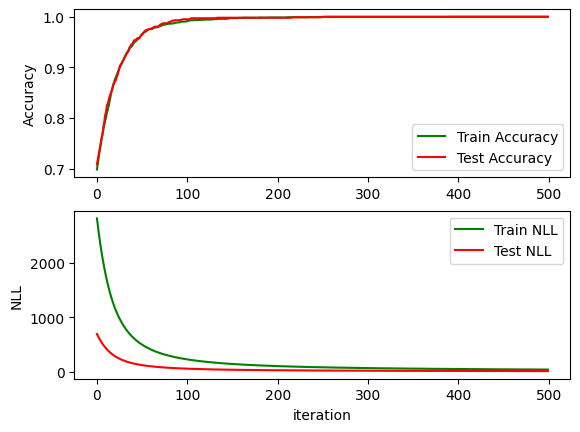

In [412]:
plot_evolution(train_acc, test_acc, train_nll, test_nll)

#### Implementare folosind biblioteca scikit-learn

In [420]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Pregătirea datelor
X, X_train, X_test, T, T_train, T_test = get_data(full_file_avc, train_file_avc, test_file_avc)

# Definirea modelului
model = LogisticRegression()

# Antrenarea modelului
print(X_train.shape)
print(T_train.shape)
model.fit(X_train, T_train)

# Evaluarea modelului
T_pred = model.predict(X_test)
accuracy = accuracy_score(T_test, T_pred)
print("Accuracy:", accuracy)

(4088, 23)
(4088,)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

### Multi-Layered Perceptron (MLP)

#### Implementare manuală

In [422]:
class Layer:

    def forward(self, x: np.ndarray) -> np.ndarray:
        raise NotImplementedError
        
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        raise NotImplementedError
        
    def update(self, *args, **kwargs):
        pass  # If a layer has no parameters, then this function does nothing

In [432]:
from typing import List

class FeedForwardNetwork:
    
    def __init__(self, layers: List[Layer]):
        self.layers = layers
        
    def forward(self, x: np.ndarray, train: bool = True) -> np.ndarray:
        self._inputs = []
        for layer in self.layers:
            if train:
                self._inputs.append(x)
            x = layer.forward(x)
        return x
    
    def backward(self, dy: np.ndarray) -> np.ndarray:
        # TODO <0> : Calculati gradientul cu fiecare strat
        # Pasi:
        #   - iterati in ordine inversa prin straturile retelei si apelati pentru fiecare dintre ele metoda backward
        #   - folositi self._inputs salvate la fiecare pas din forward pentru a calcula gradientul cu respectivul strat
        #   - transmiteti mai departe valoarea returnata de metoda backward catre urmatorul strat
        #   - incepeti cu gradientul fata de output (dy, primit ca argument).
        # reversed_layers = reversed(self.layers)
        # index = len(self.layers) - 1

        # for layer in reversed_layers:
        #     dy = layer.backward(self._inputs[index], dy)
        #     index -= 1

        for x, layer in zip(reversed(self._inputs), reversed(self.layers)):
            dy = layer.backward(x, dy)
    
        return dy
    
    def update(self, *args, **kwargs):
        for layer in self.layers:
            layer.update(*args, **kwargs)

In [427]:
class Linear(Layer):
    
    def __init__(self, insize: int, outsize: int) -> None:
        bound = np.sqrt(6. / insize)
        self.weight = np.random.uniform(-bound, bound, (insize, outsize))
        self.bias = np.zeros((outsize,))
        
        self.dweight = np.zeros_like(self.weight)
        self.dbias = np.zeros_like(self.bias)

    def forward(self, x: np.ndarray) -> np.ndarray:
        # TODO <1>: calculați ieșirea unui strat liniar
        # x - este o matrice numpy B x M, unde 
        #    B - dimensiunea batchului,
        #    M - dimensiunea caracteristicilor de intrare (insize)
        # Sugestie: folosiți înmulțirea matricială numpy pentru a implementa propagarea înainte într-o singură trecere
        # pentru toate exemplele din batch
        self.x = x
        return np.dot(x, self.weight) + self.bias


    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        # TODO <2> : calculați dweight, dbias și returnați dx
        # x - este o matrice numpy B x M, unde 
        #     B - dimensiunea batchului, 
        #     M - dimensiunea caracteristicilor (features) de intrare (insize)
        # dy - este o matrice numpy B x N, unde 
        #     B - dimensiunea batchului, 
        #     N - dimensiunea caracteristicilor (features) de ieșire (outsize)
        # Sugestie: folosiți înmulțirea matricială numpy pentru a implementa propagarea înapoi într-o singură trecere 
        #       pentru self.dweight
        # Sugestie: folosiți numpy.sum pentru a implementa propagarea înapoi într-o singură trecere pentru self.dbias
        self.dweight = np.dot(self.x.T, dy)
        self.dbias = np.sum(dy, axis=0)
        return np.dot(dy, self.weight.T)
    
    def update(self, mode='SGD', lr=0.001, mu=0.9):
        if mode == 'SGD':
            self.weight -= lr * self.dweight
            self.bias -= lr * self.dbias
        else:
            raise ValueError('mode should be SGD, not ' + str(mode))

##### Funcția Rectified Linial Unit

In [424]:
class ReLU(Layer):
    
    def __init__(self) -> None:
        pass
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        # TODO <3> : Calculați ieșirea unei unități liniare rectificate
        return np.maximum(x, 0)
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        # TODO <4> : Calculați gradientul față de x
        # x - este o matrice numpy B x M, unde B - dimensiunea batchului, M - dimensiunea caracteristicilor
        # Sugestie: utilizați indexarea logică numpy pentru a determina unde intrarea (x) este negativă
        #       și faceți gradientul 0 pentru acele exemple
        dx = np.where(x > 0, 1, 0)  # Creates a mask with 1 where x > 0 and 0 otherwise
        return dy * dx

        raise NotImplementedError

##### Funcția de cost

In [425]:
class CrossEntropy:
    
    def __init__(self):
        pass
    
    def softmax(self, x):
        exps = np.exp(x)
        return exps / np.sum(exps,axis = 1).reshape(-1,1)

    def forward(self, y: np.ndarray, t: np.ndarray) -> float:
        # TODO <5> : Calculați probabilitatea logaritmică negativă
        # y - matrice numpy (B, K), unde B - dimensiunea batch-ului, K - numărul de clase (numărul de logaritmi)
        # t - vector numpy (B, ), unde B - dimensiunea batch-ului, care indică clasa corectă
        # Pasi: 
        #   - folositi softmax() pe intrari pentru a transforma logits (y) in probabilitati
        #   - selectati probabilitatile care corespund clasei reale (t)
        #   - calculati -log() peste probabilitati
        #   - impartiti la batch size pentru a calcula valoarea medie peste toate exemplele din batch
        p = self.softmax(y)
        correct_class_probabilities = p[np.arange(y.shape[0]), t]
        negative_log_likelihood = -np.log(correct_class_probabilities)
        mean_value = np.sum(negative_log_likelihood) / y.shape[0]

        return mean_value
    
    def backward(self, y: np.ndarray, t: np.ndarray) -> np.ndarray:
        # TODO <6> : Calculati dl/dy
        # Pasi: 
        #   - calculati softmax(y) pentru a determina probabilitatea ca fiecare element sa apartina clasei i
        #   - ajustati gradientii pentru clasa corecta: aplicati scaderea dL/dy_i = pi - delta_ti conform formulelor de mai sus
        #   - impartiti la batch size pentru a calcula valoarea medie peste toate exemplele din batch
        pi = self.softmax(y)
        t_one_hot = np.zeros_like(y)
        t_one_hot[np.arange(y.shape[0]), t] = 1
        dy = (pi - t_one_hot) / y.shape[0]


        return dy


##### Acuratețea

In [428]:
def accuracy(y: np.ndarray, t: np.ndarray) -> float:
    # TODO <7> : Calculati acuratetea
    # Pasi: 
    # - folosiți np.argmax() pentru a afla predictiile retelei
    # - folositi np.sum() pentru a numara cate sunt corecte comparand cu ground truth (t)
    # - impartiti la batch size pentru a calcula valoarea medie peste toate exemplele din batch
    prediction = np.argmax(y, axis = 1)
    correct_predictions = np.sum(prediction == t)
    accuracy = correct_predictions / y.shape[0]
    return accuracy

##### Antrenarea rețelei neurale

In [434]:
BATCH_SIZE = 1
HIDDEN_UNITS = 300
EPOCHS_NO = 20

optimize_args = {'mode': 'SGD', 'lr': .005}

net = FeedForwardNetwork([Linear(784, HIDDEN_UNITS),
                          ReLU(),
                          Linear(HIDDEN_UNITS, 10)])
cost_function = CrossEntropy()

for epoch in range(EPOCHS_NO):
    # for b_no, idx in enumerate(range(0, len(train_imgs), BATCH_SIZE)):
    # 1. Pregatim urmatorul batch
    data = get_data(full_file, train_file, test_file)
    x = data[0]
    t = data[3]
    
    # 2. Calculam gradientul
    # TODO <8>:
    # Hint: propagam batch-ul `x` prin reteaua `net`
    #       calculam eroarea pe baza iesirii retelei, folosind `cost_function` 
    #       obtinem gradientul erorii in raport cu iesirea retelei, folosind `backward` pentru `cost_function`
    #       obtinem gradientul in raport cu ponderile retelei `net` folosind `backward` pentru `net`
    print()
    y = net.forward(x)
    loss = cost_function.forward(y, t)
    dy = cost_function.backward(y, t)
    net.backward(dy)
    
    
    # 3. Actualizam parametrii retelei
    net.update(**optimize_args)
    
    print(f'\rEpoch {epoch + 1:02d} '
            f'| Batch {b_no:03d} '
            f'| Train NLL: {loss:6.3f} '
            f'| Train Acc: {accuracy(y, t) * 100:6.2f}% ', end='')

    y = net.forward(test_imgs.reshape(-1, 784), train=False)
    test_nll = cost_function.forward(y, test_labels)
    print(f'| Test NLL: {test_nll:6.3f} '
          f'| Test Acc: {accuracy(y, test_labels) * 100:3.2f}%')

ValueError: shapes (9999,105) and (784,300) not aligned: 105 (dim 1) != 784 (dim 0)

#### Implementare folosind biblioteca sckit-learn

In [433]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Pregătirea datelor
X, X_train, X_test, T, T_train, T_test = get_data(full_file_avc, train_file_avc, test_file_avc)

# Pregătire model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Antrenarea modelului
model.fit(X_train, T_train)

# Paso 6: Evaluarea modelului
T_pred = model.predict(X_test)
accuracy = accuracy_score(T_test, T_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Evaluarea algoritmilor

In [27]:
# Citirea datelor

# Preprocesarea datelor

# Utilizarea unui model de regresie pentru a prezice salariul

# Utilizarea unui model MLP pentru a prezice salariul